In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Fetch data from DB

In [4]:
from data import get_enhanced_at_bats
from datetime import datetime

enhanced_at_bats = get_enhanced_at_bats(from_date = datetime(2016, 1, 1))
enhanced_at_bats

xBA    rhb  \
game_date  game_pk home  team opponent at_bat batter pitcher                 
2016-04-03 446873  False NYM  KC       1      434158 450172   0.907  False   
                                       2      431151 450172   0.267   True   
                                       3      493316 450172   0.033   True   
                                       9      446263 450172     NaN  False   
                                       10     435522 450172     NaN  False   
...                                                             ...    ...   
2023-09-13 716607  True  MIN  TB       68     680777 687330   0.014   True   
                                       73     650489 621363   0.001   True   
                                       74     656669 621363     NaN   True   
                                       75     571657 621363   0.251   True   
                                       76     543877 596112     NaN   True   

                                                                rhp  \
game_date  game_pk home  team opponent at_bat batter pitcher          
2016-04-03 446873  False NYM  KC       1      434158 450172    True   
                                       2      431151 450172    True   
                                       3      493316 450172    True   
                                       9      446263 450172    True   
                                       10     435522 450172    True   
...                                                             ...   
2023-09-13 716607  True  MIN  TB       68     680777 687330    True   
                                       73     650489 621363   False   
                                       74     656669 621363   False   
                                       75     571657 621363   False   
                                       76     543877 596112    True   

                                                                 events  \
game_date  game_pk home  team opponent at_bat batter pitcher              
2016-04-03 446873  False NYM  KC       1      434158 450172   field_out   
                                       2      431151 450172   field_out   
                                       3      493316 450172   field_out   
                                       9      446263 450172   strikeout   
                                       10     435522 450172   strikeout   
...                                                                 ...   
2023-09-13 716607  True  MIN  TB       68     680777 687330   field_out   
                                       73     650489 621363   field_out   
                                       74     656669 621363        walk   
                                       75     571657 621363   field_out   
                                       76     543877 596112   strikeout   

                                                              park_factor  \
game_date  game_pk home  team opponent at_bat batter pitcher                
2016-04-03 446873  False NYM  KC       1      434158 450172           103   
                                       2      431151 450172           103   
                                       3      493316 450172           103   
                                       9      446263 450172           103   
                                       10     435522 450172           103   
...                                                                   ...   
2023-09-13 716607  True  MIN  TB       68     680777 687330            99   
                                       73     650489 621363            99   
                                       74     656669 621363            99   
                                       75     571657 621363            99   
                                       76     543877 596112            99   

                                                              opp_sp bats  \
game_date  game_pk home  team opponent at_bat batter pitcher          

# Initialize classifier

In [5]:
from model import BTSBatterClassifier
from sklearn.neural_network import MLPClassifier

nn = BTSBatterClassifier(MLPClassifier(random_state = 57), at_bats_df = enhanced_at_bats, pkl_name = 'nn')

# Batter per game and per PA aggregations

In [6]:
nn.batter_per_game_agg()

G_last_50G  HG%_last_50G  xHG%_last_50G  PA/G_last_50G  \
game_date  batter                                                           
2016-04-03 407812           0      0.000000       0.000000       0.000000   
           408299           0      0.000000       0.000000       0.000000   
           425877           0      0.000000       0.000000       0.000000   
           429665           0      0.000000       0.000000       0.000000   
           430832           0      0.000000       0.000000       0.000000   
...                       ...           ...            ...            ...   
2023-09-13 691783           3      0.333333       0.000000       4.000000   
           694384          19      0.842105       0.578947       4.631579   
           694497           3      0.666667       0.333333       4.000000   
           696100          12      0.750000       0.333333       3.833333   
           696285          15      0.733333       0.200000       3.933333   

                   BIP/G_last_50G  H/G_last_50G  xH/G_last_50G  
game_date  batter                                               
2016-04-03 407812        0.000000      0.000000       0.000000  
           408299        0.000000      0.000000       0.000000  
           425877        0.000000      0.000000       0.000000  
           429665        0.000000      0.000000       0.000000  
           430832        0.000000      0.000000       0.000000  
...                           ...           ...            ...  
2023-09-13 691783        1.666667      0.333333       0.130000  
           694384        3.210526      1.105263       1.103158  
           694497        2.000000      1.000000       0.892333  
           696100        2.666667      1.000000       0.799833  
           696285        2.933333      0.933333       0.800867  

[298352 rows x 7 columns]

In [7]:
nn.batter_per_pa_agg()

PA_last_200PA  BIP/PA_last_200PA  H/PA_last_200PA  \
game_date  batter                                                      
2016-04-03 407812              0           0.000000         0.000000   
           408299              0           0.000000         0.000000   
           425794              0           0.000000         0.000000   
           425877              0           0.000000         0.000000   
           429665              0           0.000000         0.000000   
...                          ...                ...              ...   
2023-09-13 691783             14           0.428571         0.071429   
           694384             88           0.693182         0.238636   
           694497             14           0.428571         0.214286   
           696100             48           0.687500         0.270833   
           696285             59           0.745763         0.237288   

                   xH/PA_last_200PA  
game_date  batter                    
2016-04-03 407812          0.000000  
           408299          0.000000  
           425794          0.000000  
           425877          0.000000  
           429665          0.000000  
...                             ...  
2023-09-13 691783          0.049286  
           694384          0.238182  
           694497          0.191214  
           696100          0.213000  
           696285          0.203610  

[362539 rows x 4 columns]

# Pitcher and bullpen per BF aggregations

In [8]:
nn.pitcher_per_bf_agg()

BF_last_200BF  K%_last_200BF  BB%_last_200BF  \
game_date  pitcher                                                 
2016-04-03 112526               0       0.000000        0.000000   
           425794               0       0.000000        0.000000   
           434538               0       0.000000        0.000000   
           444436               0       0.000000        0.000000   
           445968               0       0.000000        0.000000   
...                           ...            ...             ...   
2023-09-13 686752             200       0.255000        0.120000   
           687330             200       0.200000        0.080000   
           687922              11       0.181818        0.181818   
           690829              25       0.200000        0.200000   
           690986              86       0.302326        0.093023   

                    H/PA_last_200BF  xH/PA_last_200BF  
game_date  pitcher                                     
2016-04-03 112526          0.000000          0.000000  
           425794          0.000000          0.000000  
           434538          0.000000          0.000000  
           444436          0.000000          0.000000  
           445968          0.000000          0.000000  
...                             ...               ...  
2023-09-13 686752          0.160000          0.180515  
           687330          0.195000          0.219550  
           687922          0.272727          0.262818  
           690829          0.200000          0.175800  
           690986          0.220930          0.222360  

[152034 rows x 5 columns]

In [9]:
nn.bullpen_per_bf_agg()

BF_last_200BF  K%_last_200BF  BB%_last_200BF  \
game_date  opponent                                                 
2016-04-03 KC                    0          0.000           0.000   
           NYM                   0          0.000           0.000   
           PIT                   0          0.000           0.000   
           STL                   0          0.000           0.000   
           TB                    0          0.000           0.000   
...                            ...            ...             ...   
2023-09-13 STL                 200          0.190           0.115   
           TB                  200          0.325           0.055   
           TEX                 200          0.215           0.120   
           TOR                 200          0.245           0.100   
           WSH                 200          0.170           0.080   

                     H/PA_last_200BF  xH/PA_last_200BF  
game_date  opponent                                     
2016-04-03 KC                  0.000           0.00000  
           NYM                 0.000           0.00000  
           PIT                 0.000           0.00000  
           STL                 0.000           0.00000  
           TB                  0.000           0.00000  
...                              ...               ...  
2023-09-13 STL                 0.225           0.19990  
           TB                  0.150           0.17187  
           TEX                 0.255           0.21147  
           TOR                 0.220           0.19859  
           WSH                 0.230           0.23903  

[34341 rows x 5 columns]

# Fit classifier

In [10]:
nn.fit_model(scale_features = True, perform_pca = False)

Score on training data: 0.65
Score on testing data: 0.637


# Simulate results on test data

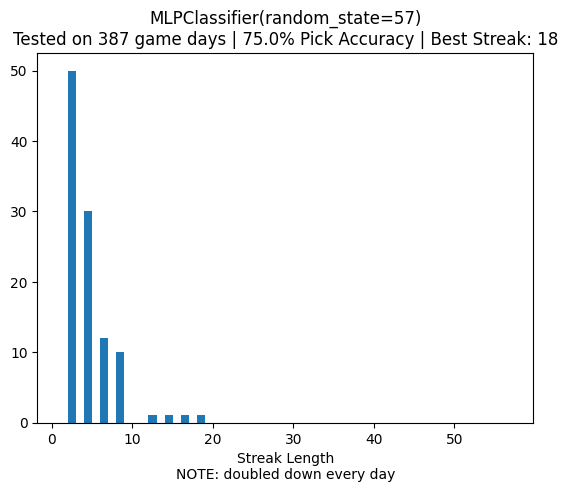

In [11]:
nn.simulate_results()

# Get predictions for today

In [12]:
todays_predictions = nn.todays_predictions()
todays_predictions

GET https://statsapi.mlb.com/api/v1/schedule?lang=en&sportId=1&gameType=R&date=2023-09-14 (200) 0.28s
GET https://baseballsavant.mlb.com/leaderboard/statcast-park-factors?type=venue&stat=index_Hits (200) 0.12s
GET https://www.mlb.com/apps/beat-the-streak/game/json/units.json (200) 0.2s
GET https://www.mlb.com/apps/beat-the-streak/game/json/squads.json (200) 0.13s
GET https://www.mlb.com/apps/beat-the-streak/game/json/players.json (200) 0.13s


game_time  lineup  \
game_date  game_pk home  team opponent batter                               
2023-09-14 716587  True  TOR  TEX      665489 2023-09-14 19:02:00       0   
           716581  False SF   COL      642731 2023-09-14 20:35:00       0   
                   True  COL  SF       663898 2023-09-14 20:35:00       0   
                                       678662 2023-09-14 20:35:00       0   
                                       592178 2023-09-14 20:35:00       0   
...                                                           ...     ...   
           716585  True  MIL  MIA      518626 2023-09-14 14:05:00       0   
           716584  False CIN  DET      571912 2023-09-14 13:05:00      10   
           716585  False MIA  MIL      607732 2023-09-14 14:05:00       0   
           716584  True  DET  CIN      668670 2023-09-14 13:05:00       5   
           716588  False AZ   NYM      664874 2023-09-14 16:05:00       0   

                                                                name bats  \
game_date  game_pk home  team opponent batter                               
2023-09-14 716587  True  TOR  TEX      665489  Vladimir Guerrero Jr.    R   
           716581  False SF   COL      642731         Thairo Estrada    R   
                   True  COL  SF       663898        Brendan Rodgers    R   
                                       678662         Ezequiel Tovar    R   
                                       592178            Kris Bryant    R   
...                                                              ...  ...   
           716585  True  MIL  MIA      518626         Josh Donaldson    R   
           716584  False CIN  DET      571912             Luke Maile    R   
           716585  False MIA  MIL      607732        Jacob Stallings    R   
           716584  True  DET  CIN      668670            Jake Rogers    R   
           716588  False AZ   NYM      664874            Seby Zavala    R   

                                               opp_sp     opp_sp_name throws  \
game_date  game_pk home  team opponent batter                                  
2023-09-14 716587  True  TOR  TEX      665489  543135  Nathan Eovaldi      R   
           716581  False SF   COL      642731  502624  Chase Anderson      R   
                   True  COL  SF       663898  657277      Logan Webb      R   
                                       678662  657277      Logan Webb      R   
                                       592178  657277      Logan Webb      R   
...                                               ...             ...    ...   
           716585  True  MIL  MIA      518626  691587      Eury Pérez      R   
           716584  False CIN  DET      571912  681857     Reese Olson      R   
           716585  False MIA  MIL      607732  605288   Adrian Houser      R   
           716584  True  DET  CIN      668670  571882       Derek Law      R   
           716588  False AZ   NYM      664874  673540     Kodai Senga      R   

                                               park_factor  hp_to_1b        H%  
game_date  game_pk home  team opponent batter                                   
2023-09-14 716587  True  TOR  TEX      665489          100      4.62  0.849749  
           716581  False SF   COL      642731          115      4.33  0.843652  
                   True  COL  SF       663898          115      4.64  0.833526  
                                       678662          115      4.37  0.827496  
                                       592178          115      4.58  0.800849  
...                                                    ...       ...       ...  
           716585  True  MIL  MIA      518626           93      4.80  0.398960  
           716584  False CIN  DET      571912           98      4.67  0.385253  
           716585  False MIA  MIL      607732           93      5.11  0.360683  
           716584  True  DET  CIN      668670           98      4.66  0.349719  
           716588  False AZ   NYM      